In [17]:
# Importing Libraries

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance
from sklearn.cluster import KMeans


In [18]:
# 2.Load the data set
x1=np.array([1,2,3,4,5,6,7,8,9,0,12,45,67,89])
x2=np.array([2,3,4,5,66,77,67,12,45,76,9,8,7,6])
data = pd.DataFrame({'x':x1,'y':x2})
data

,x,y
0,1,2
1,2,3
2,3,4
3,4,5
4,5,66
5,6,77
6,7,67
7,8,12
8,9,45
9,0,76


In [19]:
# 3.top values
data.head()

,x,y
0,1,2
1,2,3
2,3,4
3,4,5
4,5,66


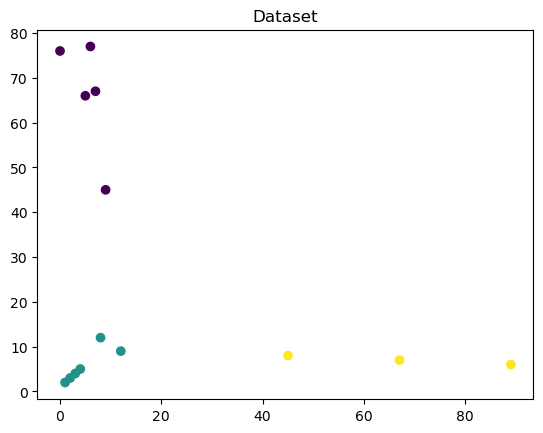

In [20]:
# 4.
plt.plot()
plt.title('Dataset')
plt.scatter(x1,x2,c=kmeans.labels_)
plt.show()

In [21]:
# 4.select x1 only
data['x']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9      0
10    12
11    45
12    67
13    89
Name: x, dtype: int64

In [22]:
# 5.import KMean clustering
from sklearn.cluster import KMeans

In [23]:
# 6.List to store within cluster sum of square(wcss)
kmeans = KMeans(n_clusters = 1, max_iter = 100,n_init='auto').fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

Clusters assigned to each datapoints :
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 22414.64285714286


In [55]:
# 7.Fit the kMeans algorithm with different values of k
# for k=2
kmeans = KMeans(n_clusters = 9, max_iter = 100,n_init='auto',random_state=42).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)
# for k=3
kmeans = KMeans(n_clusters = 3, max_iter = 100,n_init='auto',random_state=42).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

Clusters assigned to each datapoints :
0     2
1     2
2     2
3     2
4     0
5     6
6     0
7     7
8     5
9     8
10    7
11    1
12    4
13    3
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 25.0
Clusters assigned to each datapoints :
0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    2
12    2
13    2
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 1931.6333333333334


For cluster = 1, SSE/WCSS is 22414.642857142855
For cluster = 2, SSE/WCSS is 9531.555555555555
For cluster = 3, SSE/WCSS is 1840.8333333333333
For cluster = 4, SSE/WCSS is 1262.833333333333
For cluster = 5, SSE/WCSS is 535.3333333333333


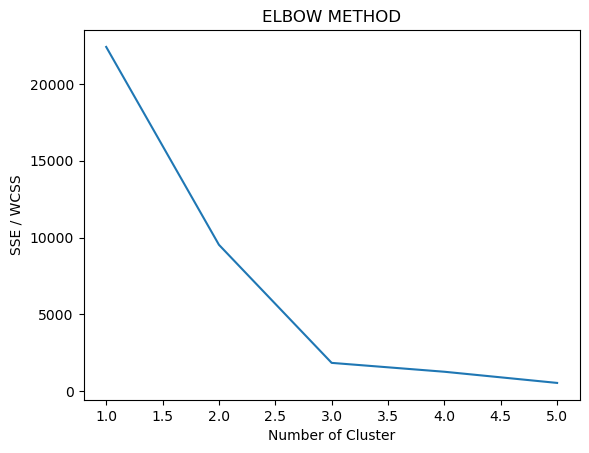

In [24]:
# 8.plot the wcss values
# ELBOW METHOD
# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters

sse = {}

for k in range(1,6): # Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100,n_init='auto',random_state=42).fit(data)
  data['clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()


In [25]:
# 9.fit KMeans algo with k=5
kmeans = KMeans(n_clusters = 3, max_iter = 100,n_init='auto',random_state=42).fit(data)
data['clusters'] = kmeans.labels_
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)


Sum of Square Error/ WCSS is : 1850.7000000000003


In [10]:
data

,x,y,clusters
0,1,2,1
1,2,3,1
2,3,4,1
3,4,5,1
4,5,66,0
5,6,77,0
6,7,67,0
7,8,12,1
8,9,45,0
9,0,76,0


In [26]:
# 10.Make predictions

new_points = pd.DataFrame({'x': [10, 50,30,60,20], 'y': [10, 50,66,55,45],'clusters':[1,1,0,2,2]})
predictions = kmeans.predict(new_points)
print("Predicted cluster labels for new points:", predictions)



Predicted cluster labels for new points: [1 2 0 2 0]


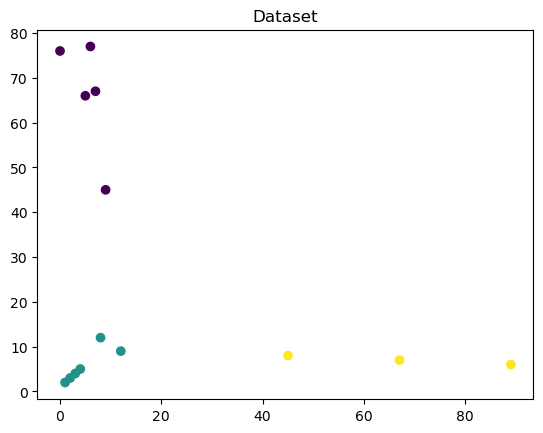

In [27]:
# 11.visualizing the clusters
plt.plot()
plt.title('Dataset')
plt.scatter(x1,x2,c=kmeans.labels_)
plt.show()